Assignment 3 

Tianyi Zou 

260724913

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

1.1 Implement the K-means clustering algorithm using only the numpy library

In [2]:
#load the image
img=cv2.cvtColor(cv2.imread('yellowlily.png'),cv2.COLOR_BGR2RGB)
img_shape=img.shape

img=img.reshape((img.shape[0]*img.shape[1],img.shape[2]))
K=2
N=11
labels = np.random.randint(K, size=img.shape[0])

img1 = img.copy()
centroids= [img[n] for n in np.random.randint(img.shape[0], size=K)]
clusters= [[np.zeros(img[1].shape), 0] for n in range(K)]
    
segmented_images = []
i=1
while i< N:
        
    # init the size of clusters based on shape of img.shape
    clusters = [[np.zeros(img.shape[1]), 0] for n in range(K)]
    for r in range(img.shape[0]):
    # calculate the min distance between centers and clusters
        min_distance   = min([(t[0], np.linalg.norm(img[r] - t[1])**2)for t in enumerate(centroids)], key=lambda tx: tx[1])
    #type of labels
        labels[r]  = min_distance[0]
        img1[r] =  centroids[min_distance[0]]
        clusters[min_distance[0]][0] += img[r]
        clusters[min_distance[0]][1] += 1
        
    new_centroids = [sumv / card for (sumv, card) in clusters]
    # show the segmentation evolving during the first 5 iterations
    segmented_images.append(img1.reshape(img_shape).copy())
    #Calculate criteria based on the distance between centers and other pixel points
    criteria = max([np.linalg.norm(l1 - l2) for l1, l2 in zip(new_centroids, centroids)])
    #if the criteria smaller than the threshold value(absvalue) we set as input, repeat previous steps
    if criteria >= 0:
        print("Need more iteration value is " + str(criteria) )
        centroids = new_centroids
    #if the criteria reach the requirement, return the output
    else:
        break
    i+=1
    #shape back to the 2D graph
img1 = img1 .reshape(img_shape)
    

Need more iteration value is 153.31114185959103
Need more iteration value is 131.01859677321957
Need more iteration value is 36.448952554119494
Need more iteration value is 7.982958197201009
Need more iteration value is 1.1957270417753085
Need more iteration value is 0.23506078918471773
Need more iteration value is 0.04226188561762048
Need more iteration value is 0.0025614154445339587
Need more iteration value is 0.0024492238223016703
Need more iteration value is 0.0


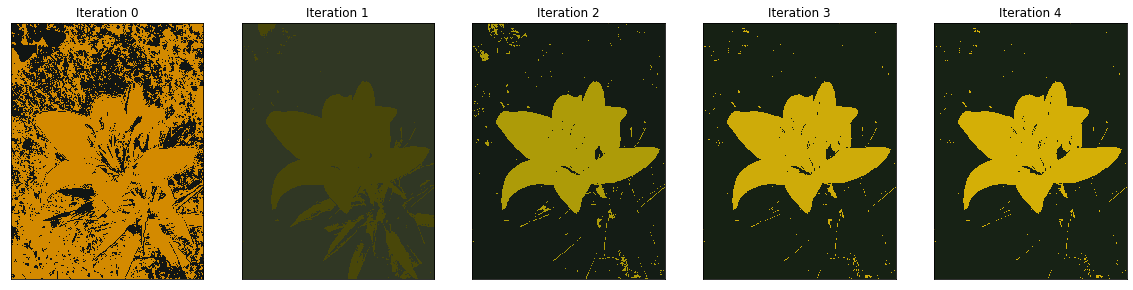

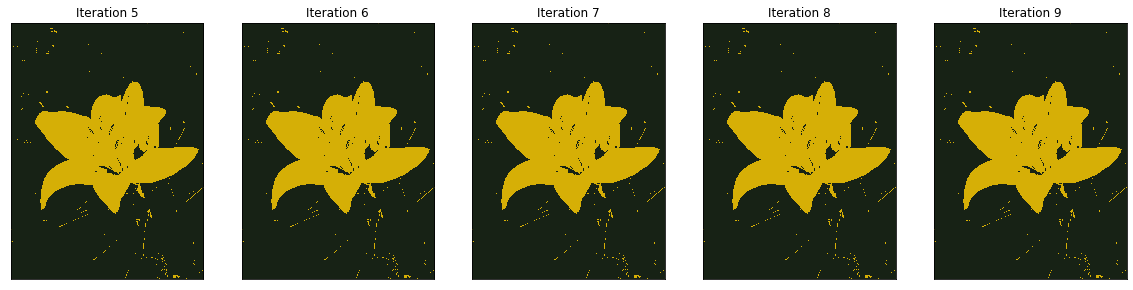

In [3]:
plt.figure(figsize=(20,20))
i=0
for i in range(0,5):
    plt.subplot(151 + i)
    plt.imshow(segmented_images[i])
    plt.title("Iteration " + str(i)), plt.xticks([]), plt.yticks([])
plt.show()    

plt.figure(figsize=(20,20))
for i in range(5,10): 
    plt.subplot(151 + i-5)
    plt.imshow(segmented_images[i])
    plt.title("Iteration " + str(i)), plt.xticks([]), plt.yticks([])
plt.show()

1.2 Implement the EM algorithm using only the numpy library.

In [4]:
def expectation(img, pi, meangaus, covar, k):
        h, w, _ = img.shape
        exp = np.empty(shape=(h, w, k))
        for i in range(h):
            for j in range(w):
                offset=img[i][j]-meangaus
                nominator=np.power(math.e,(-1/2)*np.power(offset/covar,2))
                denominator=math.sqrt(2*math.pi)*covar
                
                exp[i][j] = np.linalg.norm(nominator/denominator,axis=-1)
        
        sum_e = np.sum(exp * pi, axis=-1)
        sum_e = sum_e.reshape((h, w, 1))
        
        return exp/sum_e
    
def maximization(img, exp, pi, meangaus, covar, k):
        h, w, _ = img.shape
        clusters = np.argmax(exp, axis=-1)
        
        for i in range(k):
            c = 0
            for j in range(h):
                for k in range(w):
                    c += exp[j, k, i] * img[j, k]
            meangaus[i] = c / np.sum(exp[:, :, i])
            x = img[clusters == i]
            covar[i] = np.sqrt(np.var(x, axis=0))
            pi[i] = np.size(x) / np.size(img)
        return clusters

In [5]:
img=cv2.cvtColor(cv2.imread('yellowlily.png'),cv2.COLOR_BGR2RGB)
k=2
_, _, d = img.shape
    
pi = np.random.rand(k)
pi = pi / np.sum(pi)
meangaus = np.random.random((k, d)) * 255
covar = np.full((k, d), 255/k)

images = []
for i in range(10):
    exp = expectation(img, pi, meangaus, covar, k)
    clusters = maximization(img, exp, pi, meangaus, covar, k)
    images.append({
        'image': clusters,
        'title': 'Iteration {}'.format(i)
    })
    print("continue iterations, value is ")
#return images    

continue iterations, value is 
continue iterations, value is 
continue iterations, value is 
continue iterations, value is 
continue iterations, value is 
continue iterations, value is 
continue iterations, value is 
continue iterations, value is 
continue iterations, value is 
continue iterations, value is 


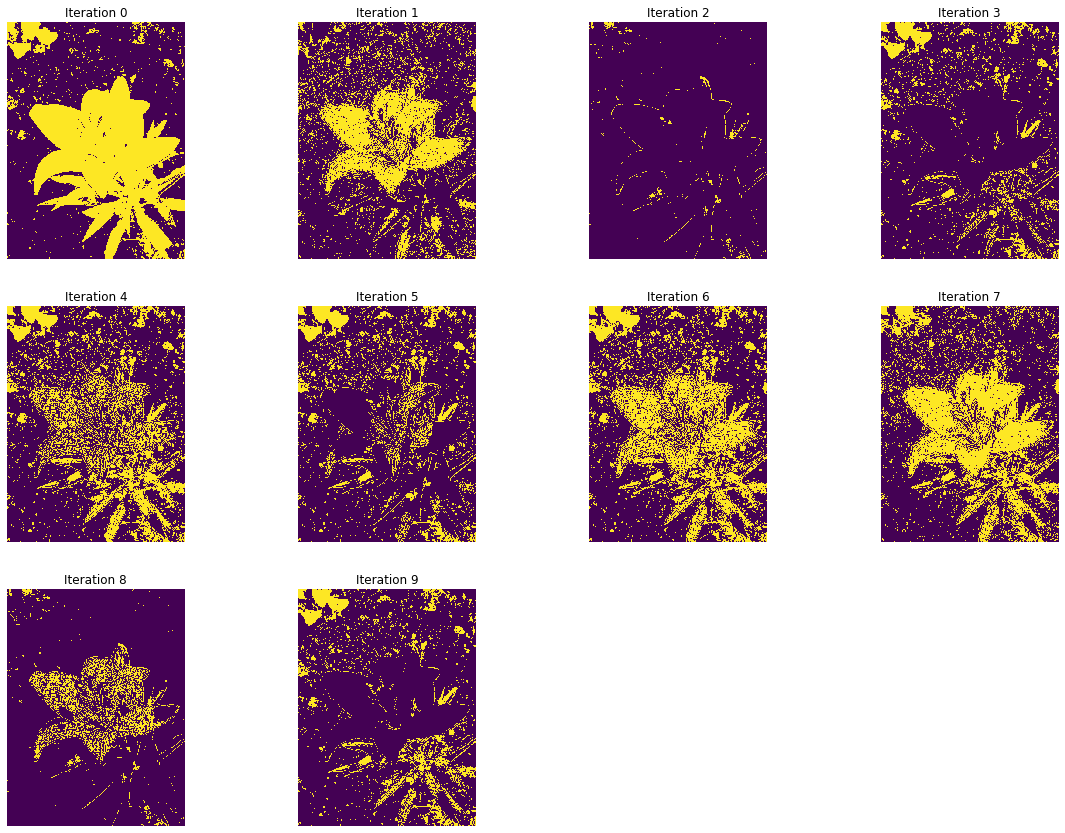

In [6]:
plt.figure(figsize=(20, 20))
for i, image in enumerate(images, 1):
    plt.subplot(4,4, i), plt.imshow(image['image'])
    plt.title(image['title']), plt.axis('off')
plt.show()

2. Stereo Vision - Epipolar Geometry

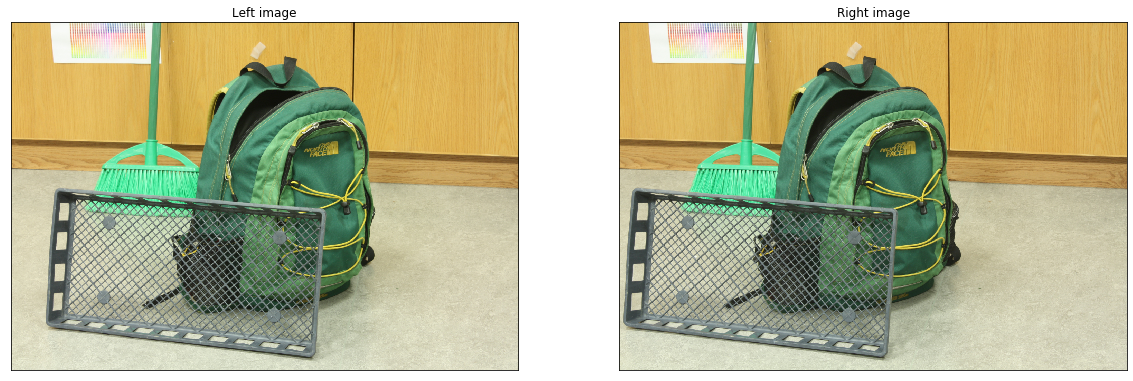

In [7]:
img0 = cv2.imread('im0.png');
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
img1 = cv2.imread('im1.png');
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img0 = cv2.resize(img0, None, fx=0.5, fy=0.5)
img1 = cv2.resize(img1, None, fx=0.5, fy=0.5)


plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img0)
plt.title("Left image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img1)
plt.title("Right image"), plt.xticks([]), plt.yticks([])
plt.show()

2.1 Compute matching SIFT keypoints from a stereo image pair.

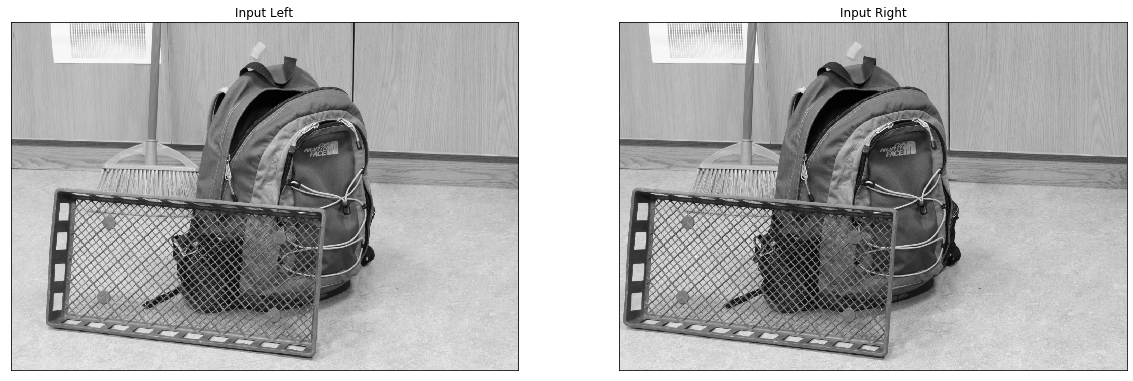

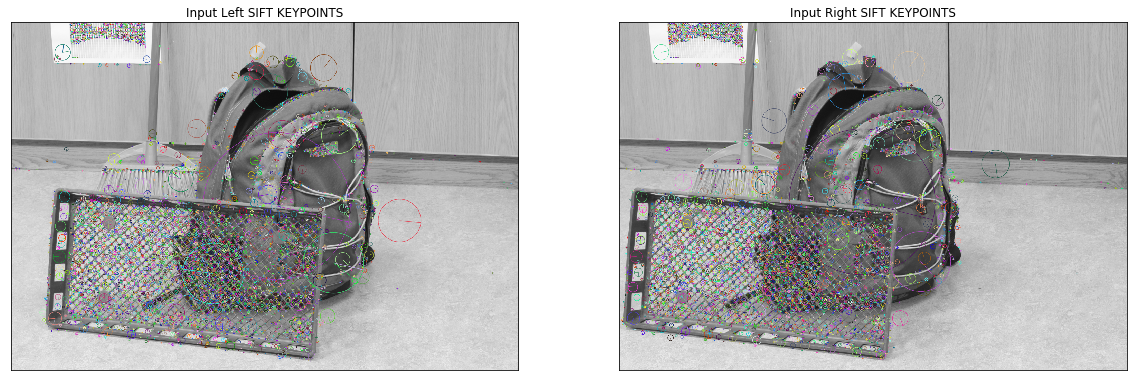

In [8]:
img0S = img0.copy()
img1S = img1.copy()
img0_disp = img0S.copy()
img1_disp = img1S.copy()

img0S = cv2.cvtColor(img0S, cv2.COLOR_RGB2GRAY)
img1S = cv2.cvtColor(img1S, cv2.COLOR_RGB2GRAY)

#Creating sift object
sift = cv2.xfeatures2d.SIFT_create()

# find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(img0S, None)
keypoints2, descriptors2 = sift.detectAndCompute(img1S, None)


cv2.drawKeypoints(img0S, keypoints1, img0_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img1S, keypoints2, img1_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(img0S,cmap="gray")
plt.title("Input Left"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img1S,cmap="gray")
plt.title("Input Right"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(img0_disp)
plt.title("Input Left SIFT KEYPOINTS"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img1_disp)
plt.title("Input Right SIFT KEYPOINTS"), plt.xticks([]), plt.yticks([])
plt.show()

2.2 Compute and display the epipolar lines for both images. 

In [9]:
def drawlines(img1, img2, lines, pts1, pts2):
    # img1 shape
    r, c = img1.shape
    # convert from grayscale to BGR
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    # for each line
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        # draw the lines and the points
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

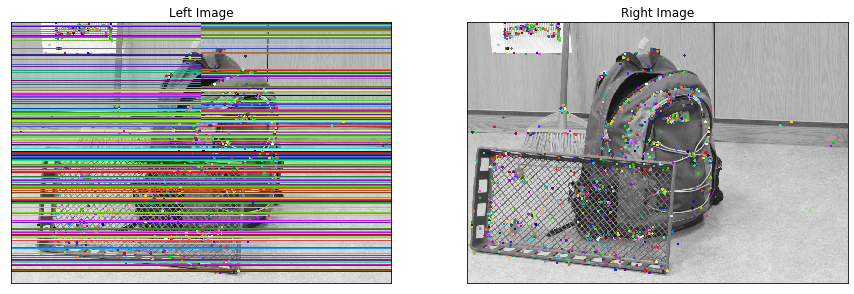

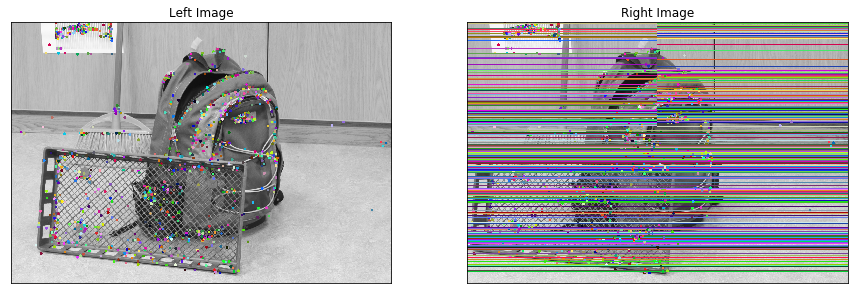

In [10]:
img0E = img0S.copy()
img1E = img1S.copy()


bfMatcher = cv2.BFMatcher(cv2.NORM_L2)
kpL, desL = keypoints1, descriptors1
kpR, desR = keypoints2, descriptors2


# match descriptors
matches = bfMatcher.knnMatch(desL, desR, k=2)

good = []
ptsL = []
ptsR = []

for i, (m, n) in enumerate(matches):
    if m.distance < 0.6 * n.distance:
        good.append(m)
        ptsR.append(kpR[m.trainIdx].pt)
        ptsL.append(kpL[m.queryIdx].pt)
# find the Fundamental Matrix
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# find epilines
# Epilines corresponding to points in the first image is drawn on the second image
linesL = cv2.computeCorrespondEpilines(ptsR, 2, F)
linesL = linesL.reshape(-1, 3)
# draw lines
imgL1, imgR1 = drawlines(img0E, img1E, linesL, ptsL, ptsR)

linesR = cv2.computeCorrespondEpilines(ptsL, 2, F)
linesR = linesR.reshape(-1, 3)
# draw lines
imgR2, imgL2 = drawlines(img1E, img0E, linesR, ptsR, ptsL)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL1, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR1, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL2, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR2, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()

2.3 Pick any one keypoint in the left image which has a correct match in the right image, and is on the corresponding epipolar line. Extract a patch of size (5  5) around this keypoint in the left image.

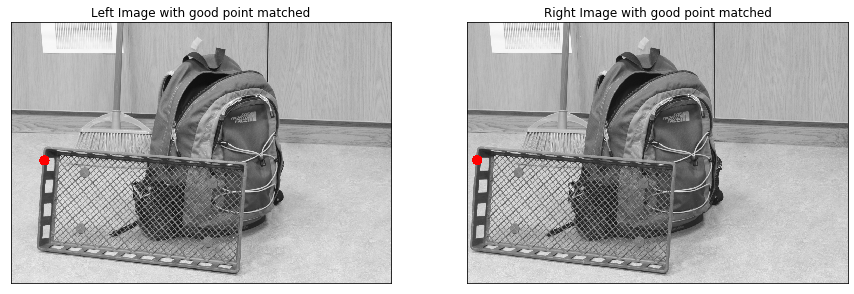

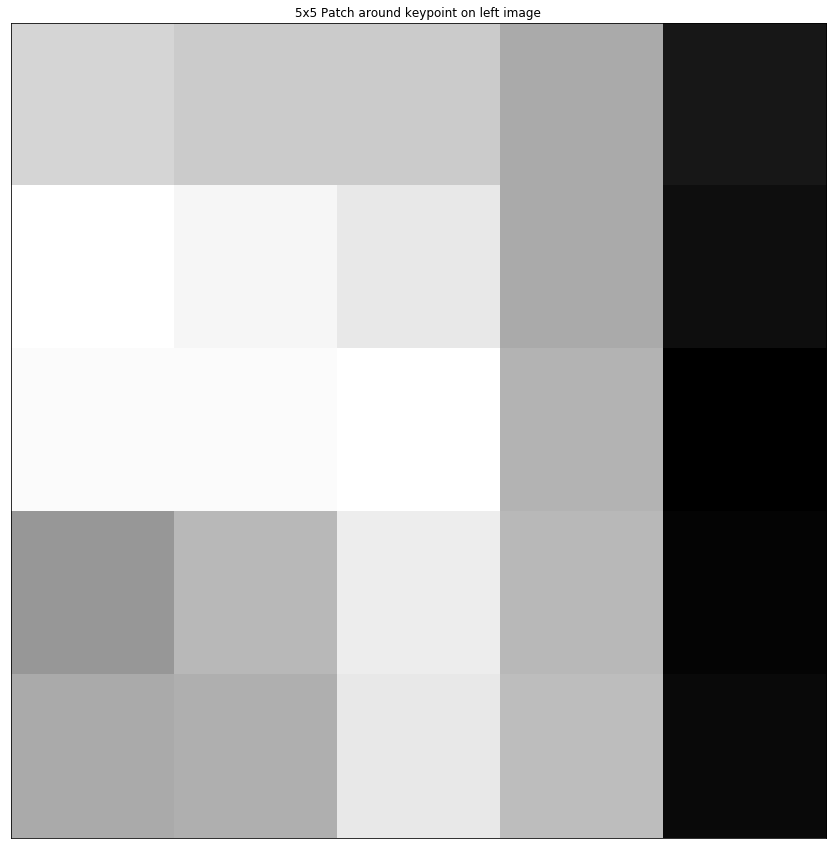

In [11]:
img0P = img0S.copy()
img1P = img1S.copy()

img0P = cv2.cvtColor(img0P, cv2.COLOR_GRAY2BGR)
img1P = cv2.cvtColor(img1P, cv2.COLOR_GRAY2BGR)


#Pick any one keypoint
leftPt = ptsL[10]
rightPt = ptsR[10]

#Draw point on images
lpt = [int(leftPt[0]),int(leftPt[1])]
rpt = [int(rightPt[0]),int(rightPt[1])]

img0Pdisp = cv2.circle(img0P, (lpt[0],lpt[1]), 20, (255,0,0), -1)
img1Pdisp = cv2.circle(img1P, (rpt[0],rpt[1]), 20, (255,0,0), -1)

patch_center_left = np.asarray(leftPt)
patch_size = 5
patch_x_left = patch_center_left[1] - int(patch_size/2)
patch_y_left = patch_center_left[0] - int(patch_size/2)
patch = img0S[patch_x_left:patch_x_left+patch_size, patch_y_left:patch_y_left+patch_size]


# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img0Pdisp, cmap="gray")
plt.title("Left Image with good point matched"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img1Pdisp, cmap="gray")
plt.title("Right Image with good point matched"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(111),plt.imshow(patch, cmap="gray")
plt.title("5x5 Patch around keypoint on left image"), plt.xticks([]), plt.yticks([])
plt.show()

2.4 Match the extracted patch to every 5  5 patch along the corresponding epipolar line in the right image. Use normalized cross correlation metric for matching. 

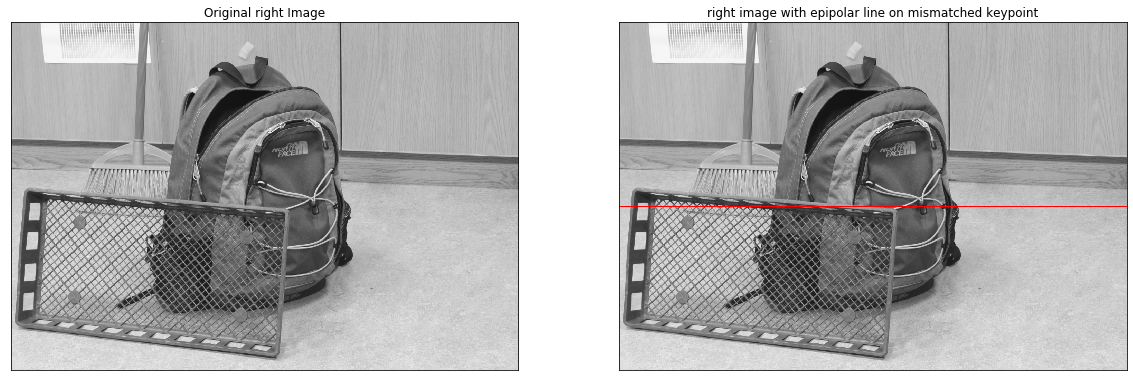

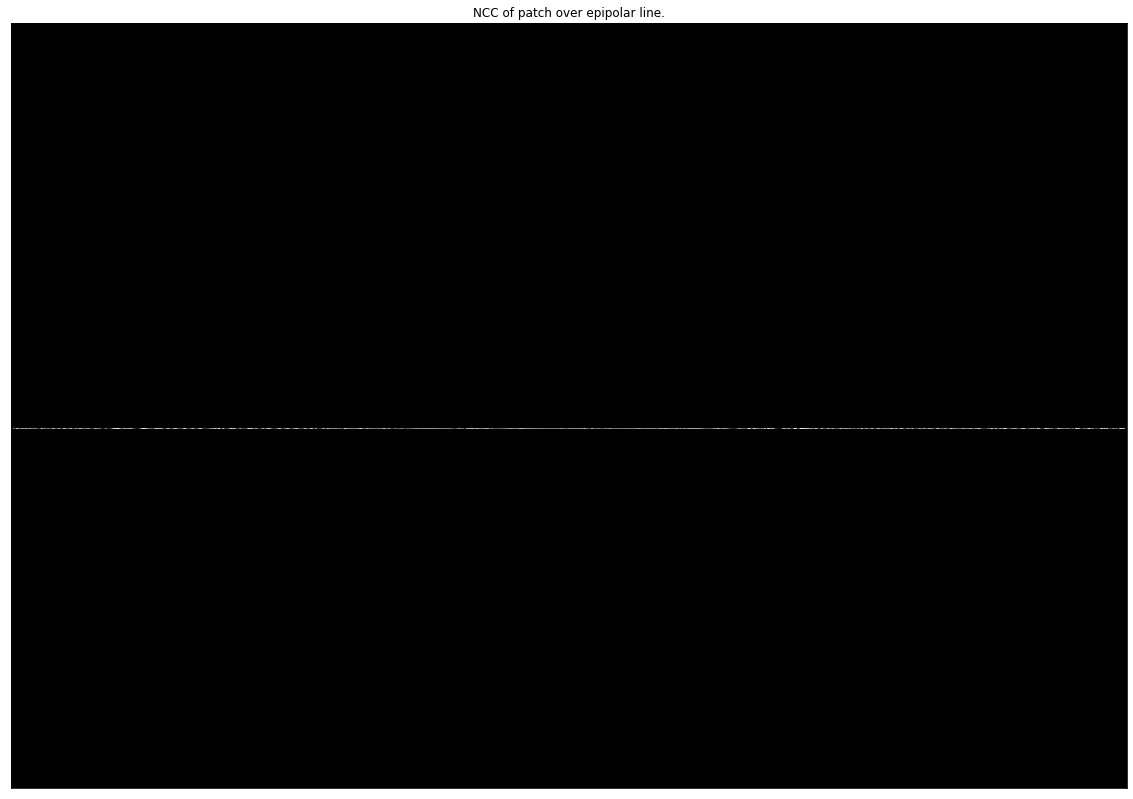

In [12]:

def _NCCpatch(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product


img0L = img0S.copy()
img1L = img1S.copy()
img0Ldisp = img0S.copy()
img1Ldisp = img1S.copy()

# convert from grayscale to BGR to be able to put color line.
img1Ldisp = cv2.cvtColor(img1Ldisp, cv2.COLOR_GRAY2BGR)
img1L = cv2.cvtColor(img1L, cv2.COLOR_GRAY2BGR)

img0Ldisp = cv2.cvtColor(img0Ldisp, cv2.COLOR_GRAY2BGR)
img0L = cv2.cvtColor(img0L, cv2.COLOR_GRAY2BGR)

#Get epipolar line  
myLPT = np.array(lpt)
myLPT = myLPT[np.newaxis]
rlines = cv2.computeCorrespondEpilines(myLPT, 2, F)
rlines = rlines[0][0]
x0,y0 = map(int, [0, -rlines[2]/rlines[1]])
x1, y1 = map(int, [img1L.shape[1], -(rlines[2]+rlines[0]*img1L.shape[1])/rlines[1]])

#Draw epipolar line on right image for displaying
img1Ldisp = cv2.line(img1Ldisp, (x0,y0), (x1,y1), (255,0,0), 2)

#Find NCC of patch along epipolar line
errorLine = np.zeros (img0L.shape)
line = np.array([img0L.shape[1]])
patchSize2 = 2
maxErr = 0
maxX = 0
maxY = 0
NCC = np.zeros([img0L.shape[1]-2*patchSize2])
for x in range(img0L.shape[1]-2*patchSize2): 
    x0 = x+patchSize2
    y0 = int(-(rlines[2]+x0*rlines[0])/rlines[1])
    currentImgPatch = img0S[y0-patchSize2:y0+patchSize2+1,x0-patchSize2:x0+patchSize2+1]
    err = _NCCpatch(patch/255,currentImgPatch/255)
    NCC[x] = err
    #Update maxNCC for normalization
    err = max(0,1-err)
    if(maxErr < err):
        maxErr = err
        maxX ,maxY = x0,y0
    errorLine[y0][x0] = err

#To make the value not clipped
errorLine = errorLine / maxErr

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img1L, cmap="gray")
plt.title("Original right Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img1Ldisp, cmap="gray")
plt.title("right image with epipolar line on mismatched keypoint"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,20))
plt.subplot(111),plt.imshow(errorLine, cmap="gray")
plt.title("NCC of patch over epipolar line."), plt.xticks([]), plt.yticks([])
plt.show()

2.5 Plot normalized cross correlation values (on y-axis) against index of the patch in the left image

Matched point on right image: x= 128 , y= 534


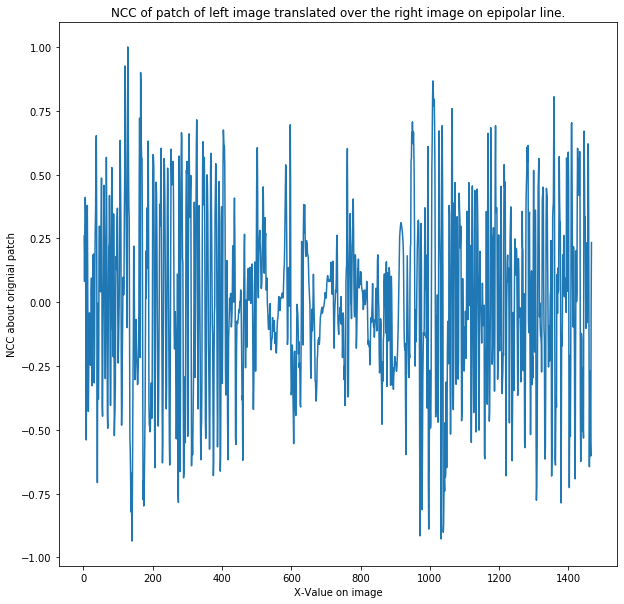

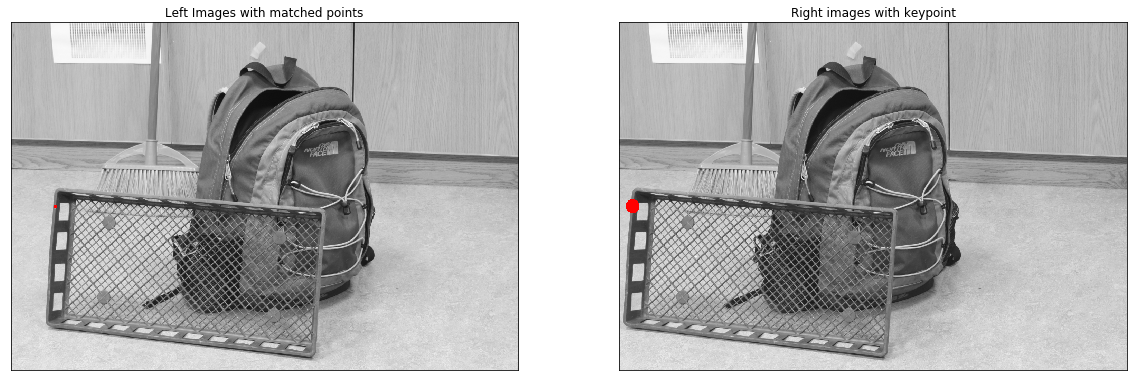

In [13]:
NCCdisp = NCC.copy()

img1Mdisp = img1Pdisp.copy()
img0Mdisp = img0S.copy()
img0Mdisp = cv2.cvtColor(img0Mdisp, cv2.COLOR_GRAY2BGR)

#Create index array
ind = range(patchSize2,NCCdisp.shape[0]+patchSize2)

#find lowest SSD
xMatched = np.where(NCCdisp == NCCdisp.max())[0] +patchSize2
yMatched = (-(rlines[2]+xMatched*rlines[0])/rlines[1]).astype(int)
#yMatched = yMatched.astype(int)

#Create point in resulting left image
color = (255,0,0)
for x,y in zip(xMatched,yMatched):
    print("Matched point on right image: x=",x,", y=",y)
    img0Mdisp = cv2.circle(img0Mdisp, (x,y), 5, color, -1)
    


#Display results
plt.figure(figsize=(10,10))
plt.plot(ind,NCCdisp)
plt.title("NCC of patch of left image translated over the right image on epipolar line.")
plt.xlabel("X-Value on image"), plt.ylabel("NCC about orignial patch")
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img0Mdisp, cmap="gray")
plt.title("Left Images with matched points"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img1Mdisp, cmap="gray")
plt.title("Right images with keypoint"), plt.xticks([]), plt.yticks([])
plt.show()

2.6 Did you find exactly one matching point or multiple matches? Is the
matching point you found the correct one? Explain.

Only one point is found in the right image by finding the maximum NCC. The found matched point is the correct one. Since the translation between two images is small, the two points on the left and right images have similar intensities, thus they will have a high NCC. 

3 Motion Algorithm - Multi-resolution Lucas-Kanade optical flow estimation

3.1 Extract good points to track from `frame1.png' using the Harris corner
detector. Use the openCV function goodFeaturesToTrack and set the
parameter value maxCorners=500. Search for the optimal values for the
parameters qualityLevel, minDistance, blockSize.

In [61]:
# read images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")
err_array=[]
# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
levelval= [1,2,3,4,5,6,7,8,9,10]
for i in levelval:
    # parameters for ShiTomasi corner detection
    feature_params = dict( maxCorners = 500,
                           qualityLevel = 0.3,
                           minDistance = 7,
                           blockSize = 7 )

    # parameters for lucas kanade optical flow
    lk_params = dict( winSize = (13,13),
                      maxLevel = i,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                 10, 0.03))

    p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)
    p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)


    
    

3.2 Compute the optical flow between `frame1.png' and `frame2.png' for the above detected points.
For each pyramid level, compute the mean of the tracking error returned by calcOpticalFlowPyrLK function for points whose correspondence search is successful.

In [62]:
# read images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")
err_array=[]
# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
levelval= [1,2,3,4,5,6,7,8,9,10]
for i in levelval:
    # parameters for ShiTomasi corner detection
    feature_params = dict( maxCorners = 500,
                           qualityLevel = 0.3,
                           minDistance = 7,
                           blockSize = 7 )

    # parameters for lucas kanade optical flow
    lk_params = dict( winSize = (13,13),
                      maxLevel = i,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                 10, 0.03))

    # find good corners in the first image
    p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)
    err_avg= np.sum(err)/(len(err))
    err_array.append(err_avg)
    print('Pyramid level:', i, "; mean error: ", err_avg)

    
    

Pyramid level: 1 ; mean error:  6.9917773078469665
Pyramid level: 2 ; mean error:  6.991156634162454
Pyramid level: 3 ; mean error:  6.989693585564108
Pyramid level: 4 ; mean error:  6.989405912511489
Pyramid level: 5 ; mean error:  6.989405912511489
Pyramid level: 6 ; mean error:  6.989405912511489
Pyramid level: 7 ; mean error:  6.989405912511489
Pyramid level: 8 ; mean error:  6.989405912511489
Pyramid level: 9 ; mean error:  6.989405912511489
Pyramid level: 10 ; mean error:  6.989405912511489


3.3 Display the optical flow for each setting of maximum pyramid level. Comment on the quality of the results. 

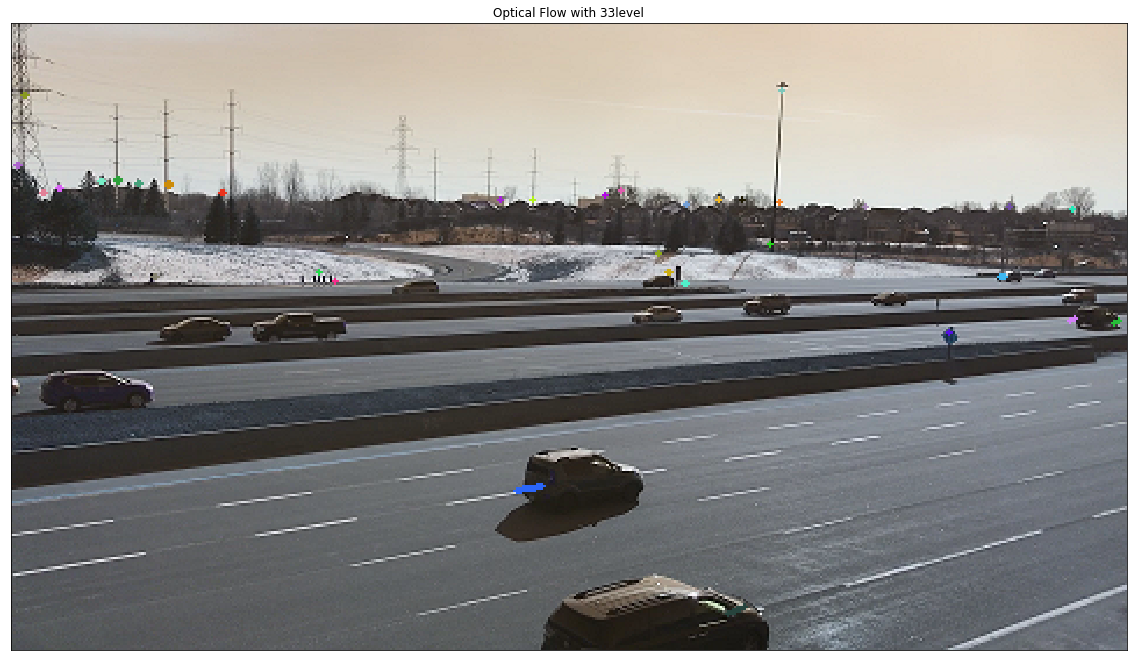

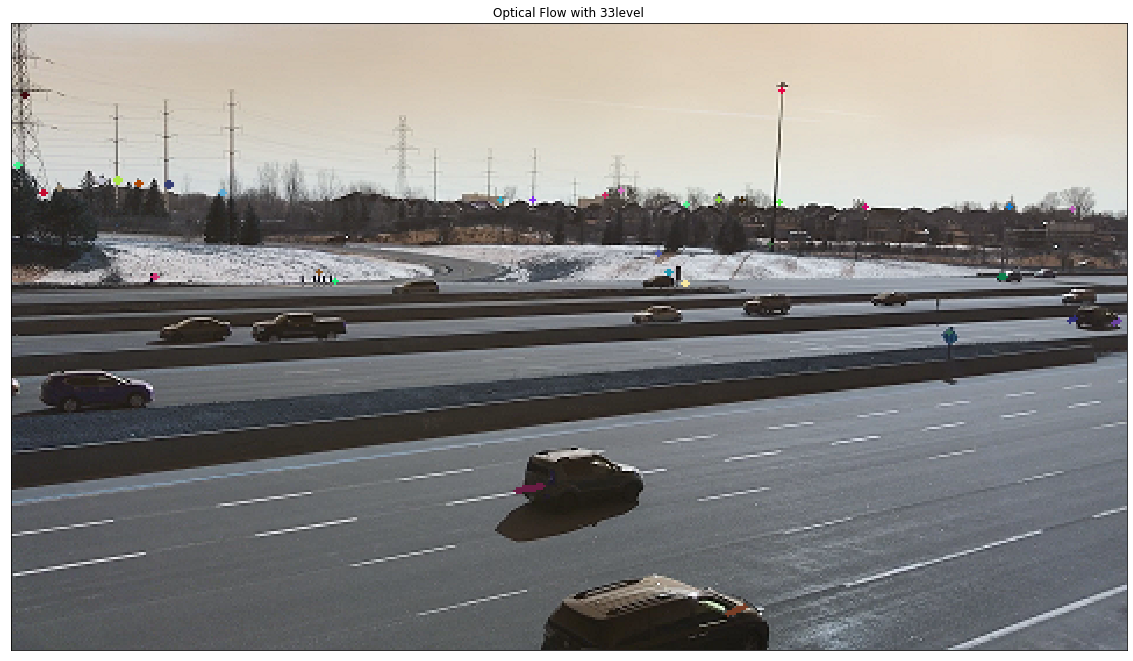

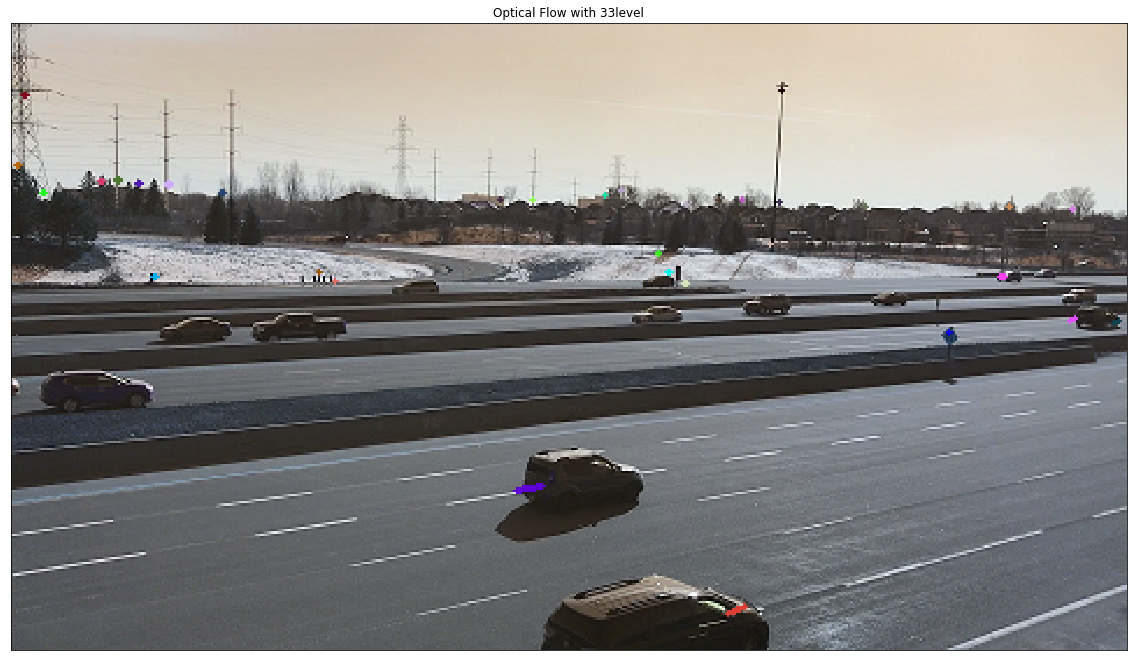

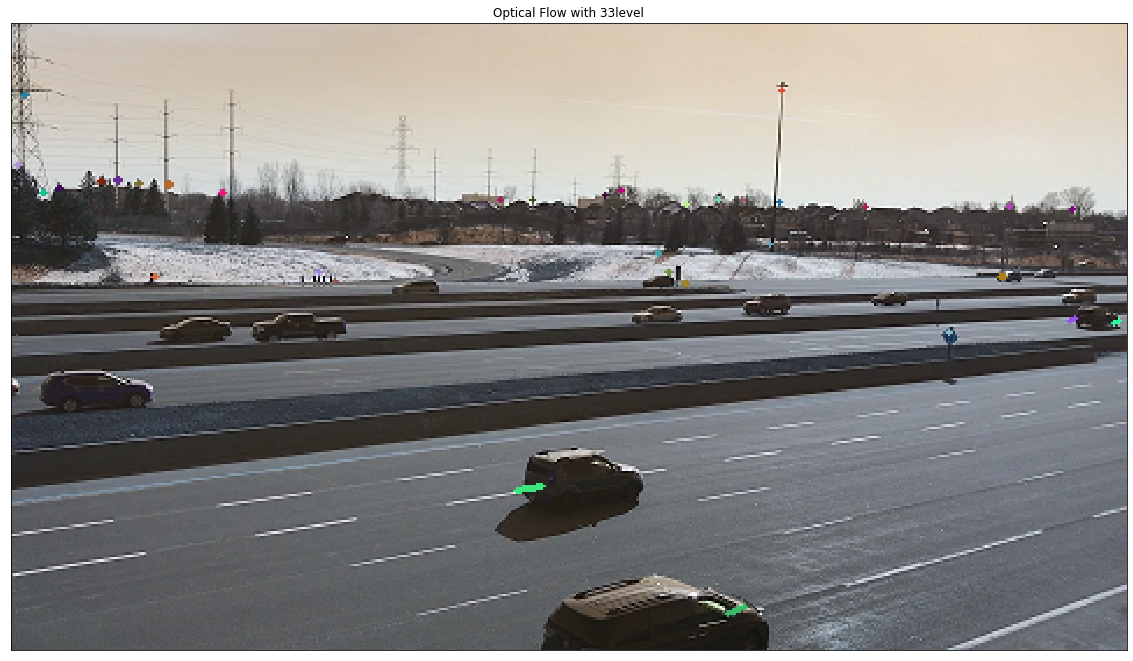

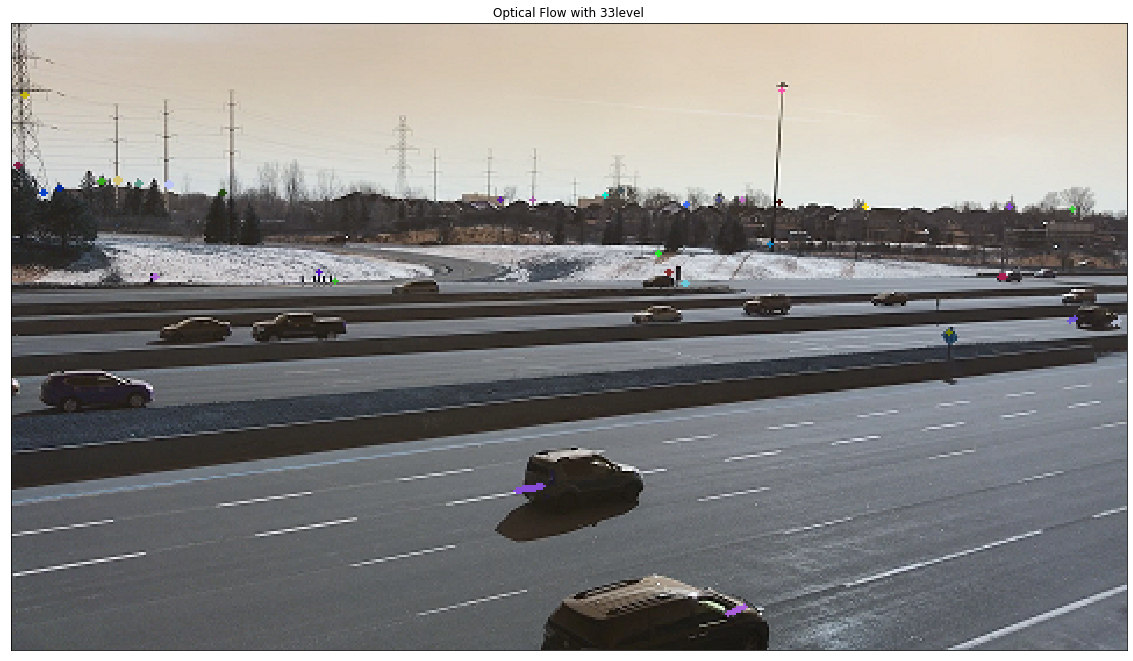

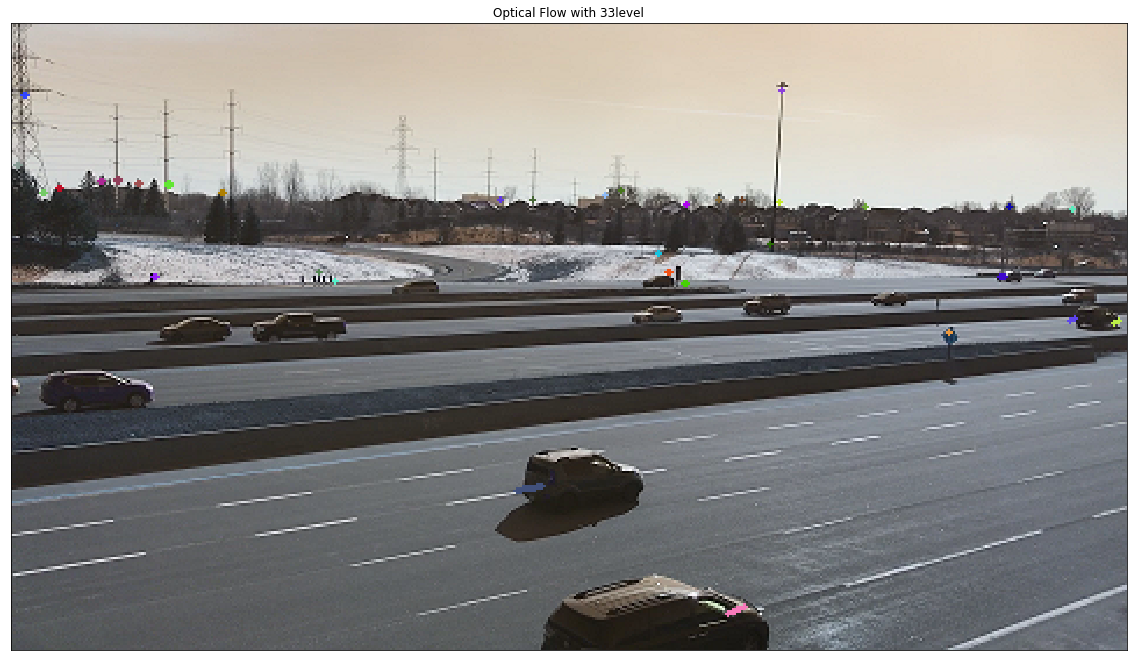

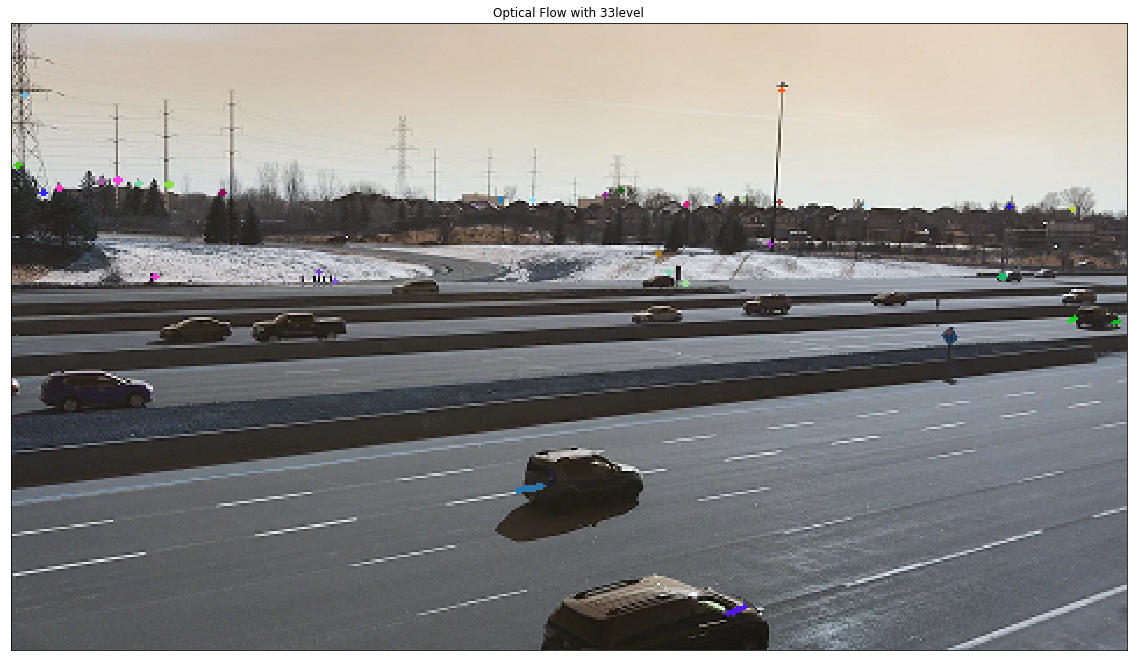

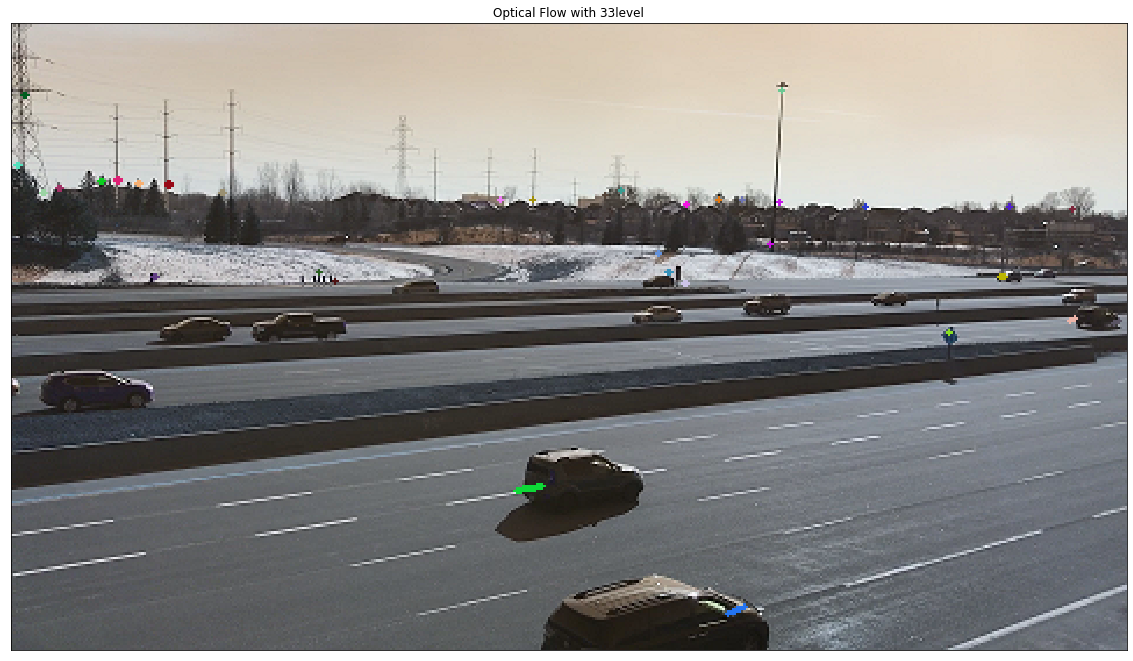

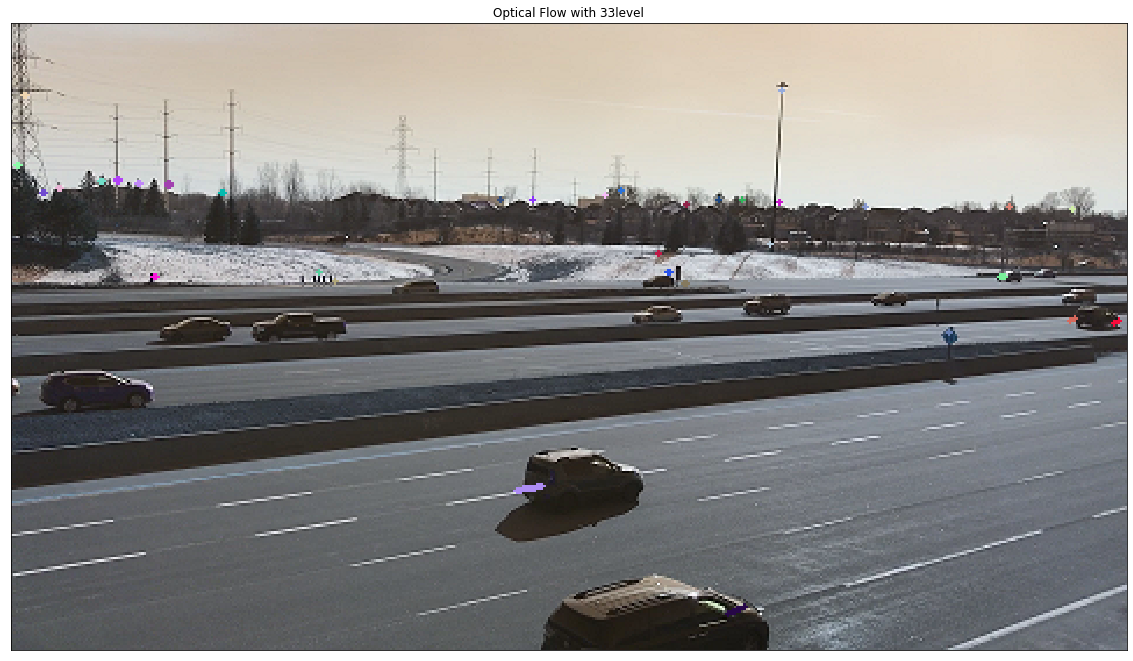

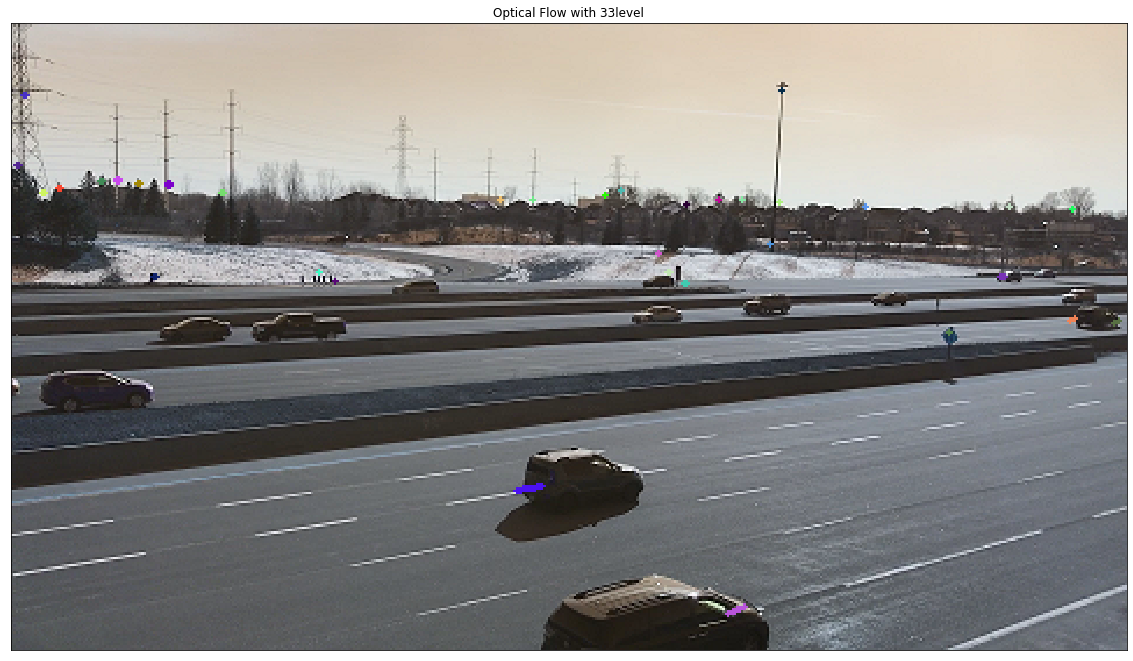

In [63]:
# read images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")
err_array=[]
# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
levelval= [1,2,3,4,5,6,7,8,9,10]
for i in levelval:
    # parameters for ShiTomasi corner detection
    feature_params = dict( maxCorners = 500,
                           qualityLevel = 0.3,
                           minDistance = 7,
                           blockSize = 7 )

  
    lk_params = dict( winSize = (13,13),
                      maxLevel = i,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                 10, 0.03))

    # find good corners in the first image
    p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)
    # select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # create some random colors
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

   
    img_disp = img1.copy()

    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(img_disp, (a,b), (c,d), color[i].tolist(), 2)

    # display images
    plt.figure(figsize=(20,20))
    plt.imshow(img_disp)
    plt.title("Optical Flow with "+ str(i)+ "level"), plt.xticks([]), plt.yticks([])
    plt.show()

The optical flow for image at level 3 to 10 are similar, however the optical flow at level 0-2 
is not as good as the rest ones. 
The reason is that some static object which shouldn't consider as the "breaking assumptions" are getting blurry as the pyramid level getting too high, which will cause some mismatchings.

3.4 Plot the mean of the error (on y-axis) vs. pyramid level (on x-axis). Discuss the trends you observe in the plot.

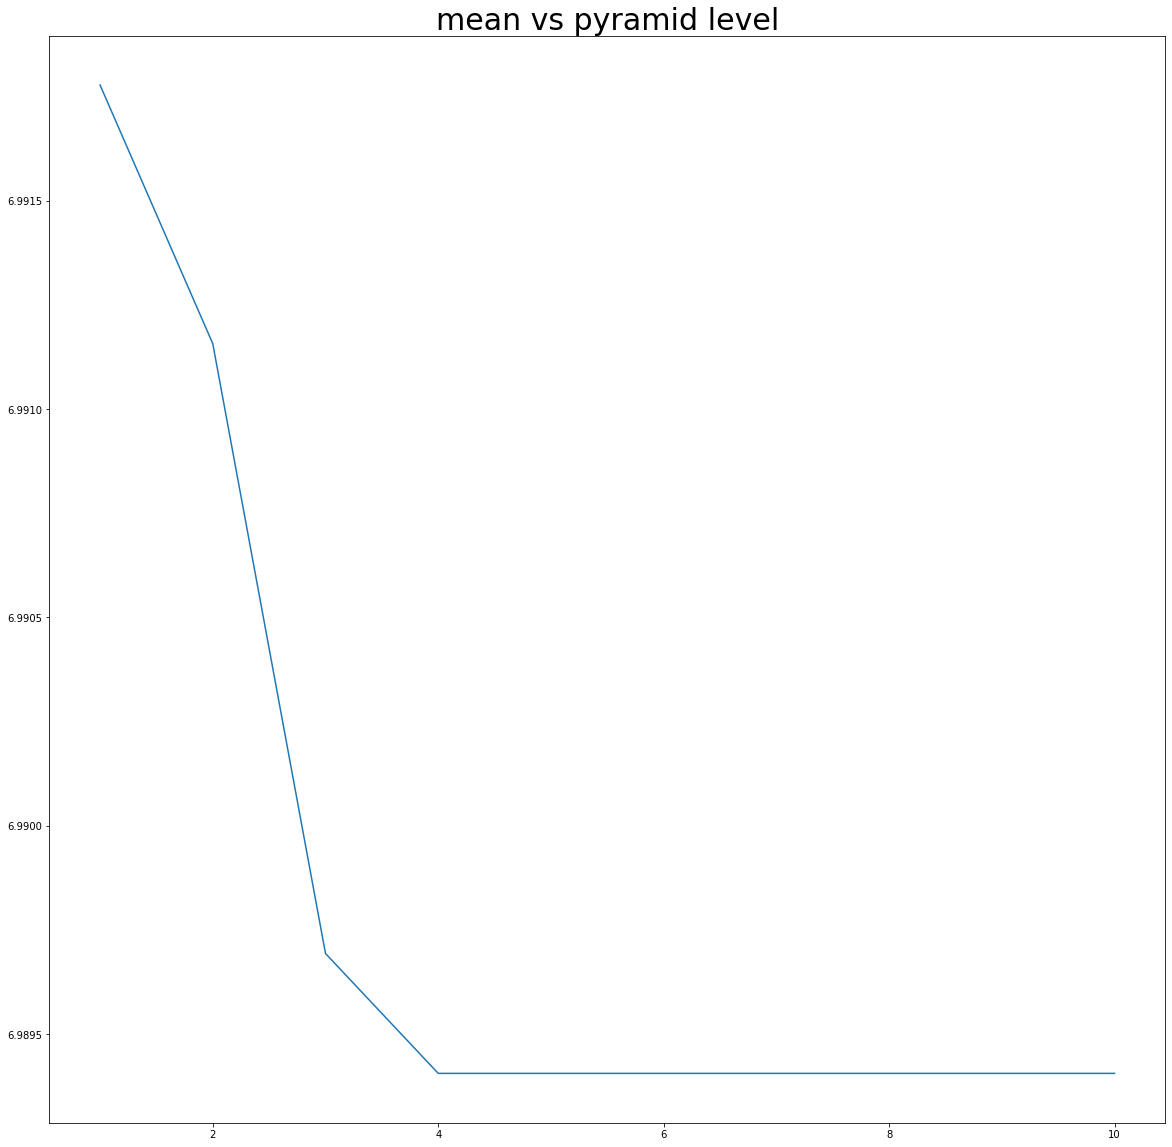

In [65]:
# read images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")
err_array=[]
# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
levelval= [1,2,3,4,5,6,7,8,9,10]
for i in levelval:
    # parameters for ShiTomasi corner detection
    feature_params = dict( maxCorners = 500,
                           qualityLevel = 0.3,
                           minDistance = 7,
                           blockSize = 7 )

    # parameters for lucas kanade optical flow
    lk_params = dict( winSize = (13,13),
                      maxLevel = i,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                 10, 0.03))

    # find good corners in the first image
    p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)
    err_avg= np.sum(err)/(len(err))
    err_array.append(err_avg)
    #print('Pyramid level:', i, "; mean error: ", err_avg)
plt.figure(figsize=(20,20))
plt.plot(levelval,err_array)
plt.title("mean vs pyramid level",fontsize=30)
plt.show()
    
    

It can be observed that the mean error decreases as the pyramid level increases. The error decrease drastically from 0 to 3.The mean error keeps unchanged from level 4 to 10. 
The reason is that the large scale movements in a high-resolution image become smaller movements in a coarse scale image. After doing repeated computation for each level,the mean error will tend to stabilize. 